In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels
import statsmodels.sandbox.stats.multicomp
import pandas as pd
from statsmodels.stats.weightstats import ztest

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
1. Статкритерии (t-test, z-test) - примеры на выборках разного размера/разных средних/разных дисперсий/разных распределений
Mann-Whitney (пример на малой выборке, на очень разных формах распределения)
2. p-value распределение, проверка мощности и корректности
3. Как проверить выборку на нормальность: qq-plot, критерий Шапиро-Уилка
4. Критерий Колмогорова-Смирнова на соответствие выборки известному распределению

# Критерии: t-test, z-test, Mann-Whithey

In [ ]:
# Нормальное распределение

In [7]:
a_norm = np.random.normal(0, 1, 1000)
b_norm = np.random.normal(0, 1, 1000)

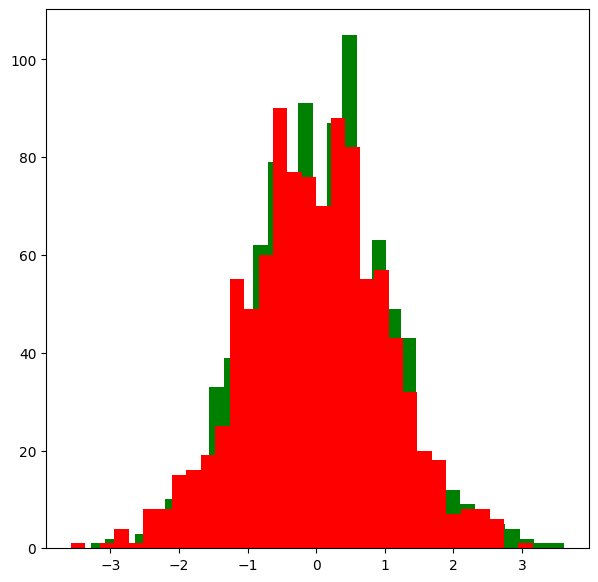

In [8]:
plt.figure(figsize=(7,7))
_ = plt.hist(a_norm, bins = 32, color='green',  linewidth=2)
_ = plt.hist(b_norm, bins = 32, color='red',  linewidth=2)

In [9]:
print(a_norm.mean(), b_norm.mean())

0.05637123243513384 -0.012677387810051037


In [10]:
print(a_norm.std(), b_norm.std())

1.0052838695054362 1.0183592739481178


Сравним результаты, полученные на разных статкритериях

In [11]:
stats.ttest_ind??

In [14]:
print(stats.ttest_ind(a_norm, b_norm, equal_var= False),'\n')
print(ztest(a_norm, b_norm),'\n')
print(stats.mannwhitneyu(a_norm, b_norm))

TtestResult(statistic=1.5251401402235543, pvalue=0.1273824394902152, df=1997.6664283728492) 

(1.5251401402235543, 0.12722414715692948) 

MannwhitneyuResult(statistic=516968.0, pvalue=0.18885682259376146)


Видим, что для выборки из нормального распределения t-test и z-test дали практически идентичные результаты

Попробуем поменять параметры распределения: размеры выборок, средние, дисперсии

In [ ]:
a_norm = np.random.normal(0, 1, 1000)
b_norm = np.random.normal(0, 1, 1000)

In [ ]:
print(a_norm.mean(), b_norm.mean())

In [ ]:
print(stats.ttest_ind(a_norm, b_norm),'\n')
print(ztest(a_norm, b_norm),'\n')
print(stats.mannwhitneyu(a_norm, b_norm))

In [15]:
def get_results_from_various_tests(a, b, alpha=0.05):
    
    ttest_pv = stats.ttest_ind(a, b)[1]
    ztest_pv = ztest(a, b)[1]
    mw_pv = stats.mannwhitneyu(a, b)[1]
    
    return {'ttest': [ttest_pv, ttest_pv < alpha], 'ztest': [ztest_pv, ztest_pv < alpha], 'MW': [mw_pv, mw_pv < alpha]}

Увеличим разницу в средних

In [16]:
a_norm = np.random.normal(50, 10, 1000)
b_norm = np.random.normal(30, 11, 1000)

In [17]:
print(a_norm.mean(), b_norm.mean())

49.78928323727342 30.51133369233634


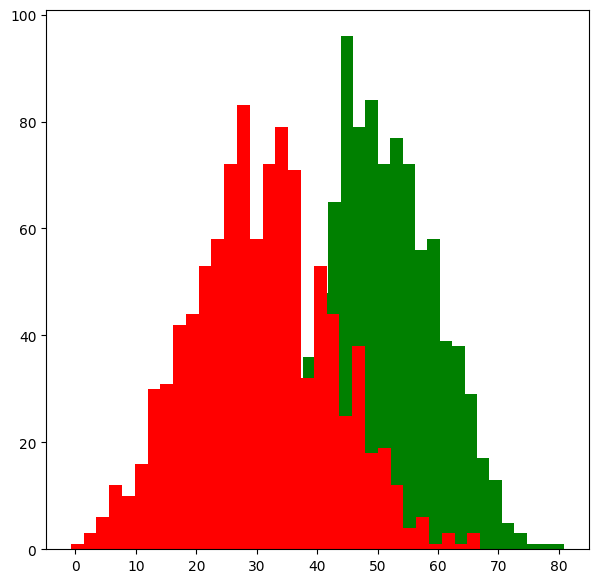

In [20]:
plt.figure(figsize=(7,7))
_ = plt.hist(a_norm, bins = 32, color='green',  linewidth=2)
_ = plt.hist(b_norm, bins = 32, color='red',  linewidth=2)

In [21]:
get_results_from_various_tests(a_norm, b_norm, alpha=0.05)

{'ttest': [1.3291548858246115e-260, True],
 'ztest': [0.0, True],
 'MW': [6.809853689855873e-208, True]}

Увеличим дисперсию

In [22]:
a_norm = np.random.normal(50, 350, 1000)
b_norm = np.random.normal(30, 100, 1000)

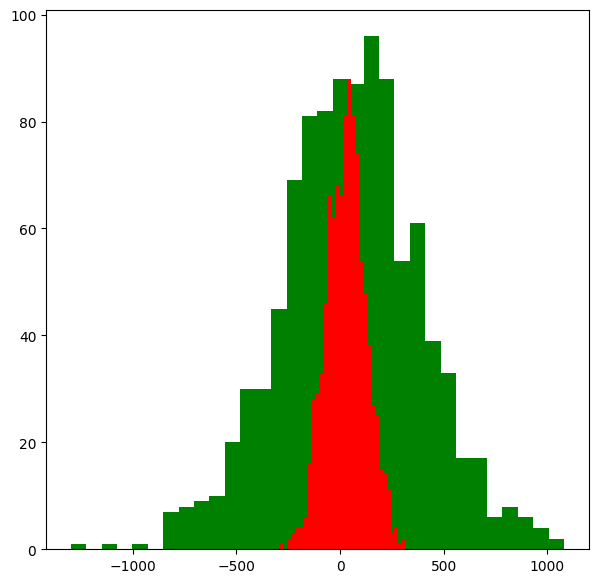

In [24]:
plt.figure(figsize=(7,7))
_ = plt.hist(a_norm, bins = 32, color='green',  linewidth=2)
_ = plt.hist(b_norm, bins = 32, color='red',  linewidth=2)

In [25]:
get_results_from_various_tests(a_norm, b_norm, alpha=0.05)

{'ttest': [0.03032895411400911, True],
 'ztest': [0.030211170611625867, True],
 'MW': [0.014698721964569802, True]}

Возьмем данные не из нормального распределения

In [38]:
a_gamma = np.random.gamma(1, 2, size = 100)
b_gamma = np.random.gamma(1, 2, size = 100)

In [39]:
print(a_gamma.mean(), b_gamma.mean())

2.1983838117854826 2.2628115383846064


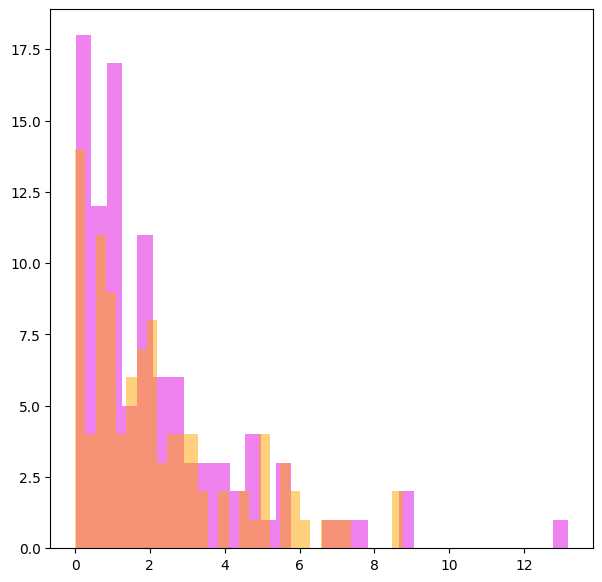

In [40]:
plt.figure(figsize=(7,7))
_ = plt.hist(a_gamma, bins = 32, color='violet',  linewidth=2)
_ = plt.hist(b_gamma, bins = 32, color='orange', alpha = 0.5, linewidth=2)

In [41]:
get_results_from_various_tests(a_gamma, b_gamma, alpha=0.05)

{'ttest': [0.8332183809041801, False],
 'ztest': [0.8330015364985848, False],
 'MW': [0.6259351579327082, False]}

Увеличим выборки и разницу в параметрах распределения

In [42]:
a_gamma = np.random.gamma(1, 24, size = 1000)
b_gamma = np.random.gamma(1, 26, size = 1000)

In [43]:
print(a_gamma.mean(), b_gamma.mean())

23.312027350973498 26.024470440696163


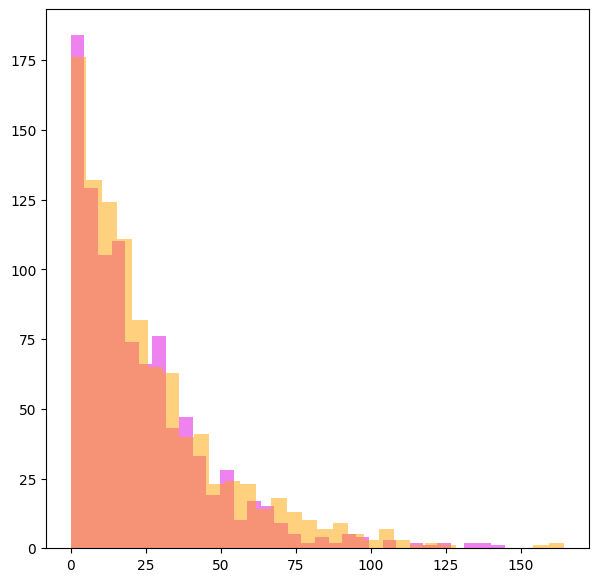

In [45]:
plt.figure(figsize=(7,7))
_ = plt.hist(a_gamma, bins = 32, color='violet',  linewidth=2)
_ = plt.hist(b_gamma, bins = 32, color='orange',alpha = 0.5,  linewidth=2)

In [46]:
get_results_from_various_tests(a_gamma, b_gamma, alpha=0.05)

{'ttest': [0.01082803351458897, True],
 'ztest': [0.010754031011010245, True],
 'MW': [0.033502632518962204, True]}

# MW-тест не проверяет разницу медиан

In [47]:
a = [-1]*100+[0]*10+[2]*100
b = [-1]*100+[0]*10+[100500]*100

In [48]:
stats.mannwhitneyu(a, b)

MannwhitneyuResult(statistic=17050.0, pvalue=1.54736025177025e-05)

# Проверим мощность и корректность

Начнем с корректности

# Корректность

In [49]:
def check_correctness(test, dist=np.random.normal, params=[5, 4], alpha=0.05):
    
    p_vals = []
#     iters = 1000
    
    for _ in range(10000):
        a = dist(25, params[0], size=1000)
        b = dist(25, params[1], size=1000)
        p = test(a, b)[1]
        p_vals.append(p)
        
    p_vals = np.array(p_vals)
    
    print(plt.hist(p_vals))
    
    return p_vals[p_vals < alpha].shape[0] / p_vals.shape[0]

(array([ 996., 1007.,  987.,  946., 1002.,  999., 1005., 1024., 1007.,
       1027.]), array([1.51158982e-05, 1.00012592e-01, 2.00010069e-01, 3.00007545e-01,
       4.00005022e-01, 5.00002498e-01, 5.99999975e-01, 6.99997451e-01,
       7.99994928e-01, 8.99992404e-01, 9.99989881e-01]), <BarContainer object of 10 artists>)


0.0491

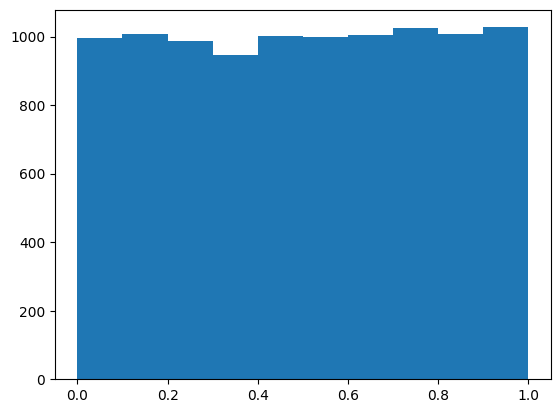

In [50]:
check_correctness(stats.ttest_ind)

В целом, работает корректно

(array([1042.,  994.,  968.,  981., 1035., 1008.,  997., 1041.,  954.,
        980.]), array([2.98344208e-04, 1.00259242e-01, 2.00220139e-01, 3.00181036e-01,
       4.00141933e-01, 5.00102831e-01, 6.00063728e-01, 7.00024625e-01,
       7.99985523e-01, 8.99946420e-01, 9.99907317e-01]), <BarContainer object of 10 artists>)


0.0539

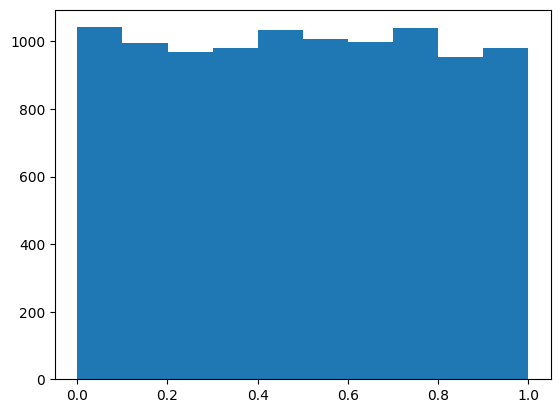

In [51]:
check_correctness(stats.mannwhitneyu)

А тут ошибка уже заметно выше 

Поменяем дисперсии:

(array([1036.,  950., 1065.,  968., 1005.,  970., 1001.,  981., 1032.,
        992.]), array([1.26825439e-04, 1.00109783e-01, 2.00092740e-01, 3.00075697e-01,
       4.00058654e-01, 5.00041611e-01, 6.00024568e-01, 7.00007525e-01,
       7.99990482e-01, 8.99973439e-01, 9.99956396e-01]), <BarContainer object of 10 artists>)


0.0518

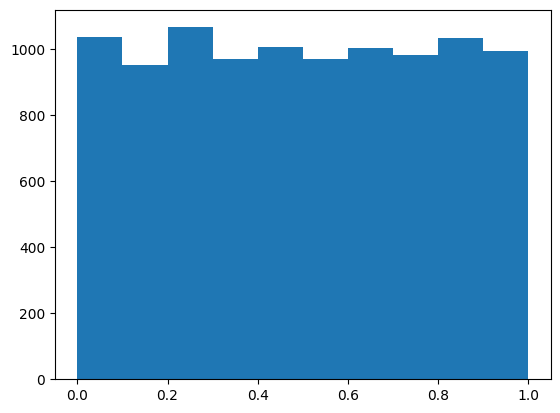

In [52]:
check_correctness(stats.ttest_ind, params=[80, 2])

In [ ]:
#А если было бы так:

p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 80, size=1000)
    b = np.random.normal(25, 2, size=100)
    p = stats.ttest_ind(a, b).pvalue
    p_vals.append(p)
        
p_vals = np.array(p_vals)
    
plt.hist(p_vals, color='red')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

In [ ]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 80, size=1000)
    b = np.random.normal(25, 2, size=100)
    p = stats.ttest_ind(a, b, equal_var=False).pvalue
    p_vals.append(p)
        
p_vals = np.array(p_vals)
    
plt.hist(p_vals, color='green')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

Проверим на другом распределении:

(array([ 917., 1185., 1226., 1144., 1022., 1034.,  921.,  851.,  807.,
        893.]), array([4.30264259e-04, 1.00366168e-01, 2.00302072e-01, 3.00237977e-01,
       4.00173881e-01, 5.00109785e-01, 6.00045689e-01, 6.99981593e-01,
       7.99917497e-01, 8.99853401e-01, 9.99789305e-01]), <BarContainer object of 10 artists>)


0.0393

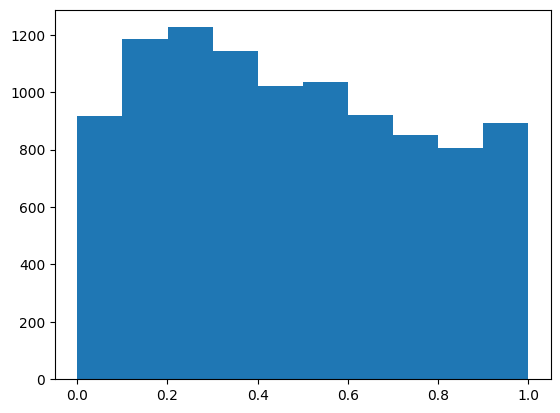

In [53]:
check_correctness(stats.ttest_ind, dist=np.random.lognormal, params=[2, 2])

Ошибка в установленных рамках, но распределение p-value далеко от равномерного

Попробуем другой статкритерий:

(array([ 893., 1143., 1214., 1181., 1084., 1006.,  944.,  884.,  818.,
        833.]), array([9.46214924e-04, 1.00847684e-01, 2.00749154e-01, 3.00650623e-01,
       4.00552093e-01, 5.00453562e-01, 6.00355032e-01, 7.00256501e-01,
       8.00157971e-01, 9.00059440e-01, 9.99960910e-01]), <BarContainer object of 10 artists>)


0.0351

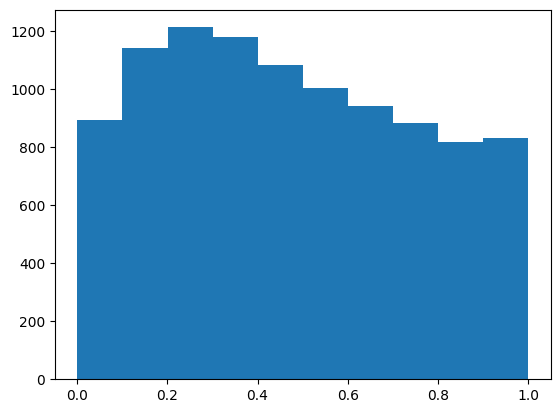

In [54]:
check_correctness(ztest, dist=np.random.lognormal, params=[2, 2])

(array([ 993.,  993., 1012.,  988.,  998.,  985., 1011.,  976., 1012.,
       1032.]), array([4.41917059e-05, 1.00030504e-01, 2.00016817e-01, 3.00003129e-01,
       3.99989442e-01, 4.99975755e-01, 5.99962067e-01, 6.99948380e-01,
       7.99934692e-01, 8.99921005e-01, 9.99907317e-01]), <BarContainer object of 10 artists>)


0.0502

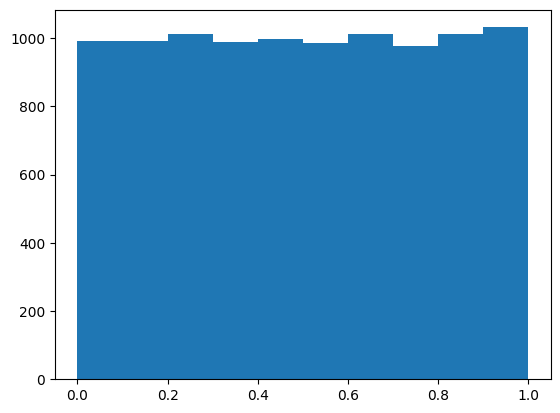

In [55]:
check_correctness(stats.mannwhitneyu, dist=np.random.lognormal, params=[2, 2])

Ошибка заметно выше, но распределение равномернее
Почему ошибка выше?
Каким будем пользоваться критерием в итоге?

Попробуем посмотреть на выборках разного размера:

0.049


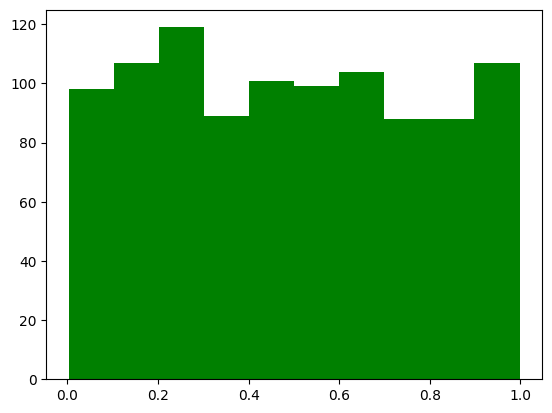

In [57]:
p_vals = []
iters = 1000
    
for _ in range(1000):
    a = np.random.lognormal(2, 2, size=100000)
    b = np.random.lognormal(2, 2, size=100000)
#     p = stats.mannwhitneyu(a, b)[1]
    p = stats.ttest_ind(a, b).pvalue
#     p_vals.append(p)
    p_vals.append(p)
        
p_vals = np.array(p_vals)
    
_ = plt.hist(p_vals, color='green')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

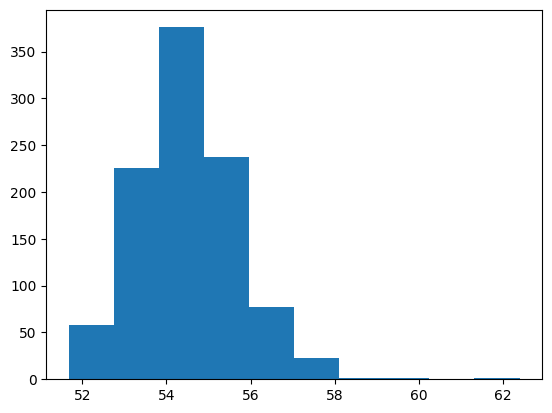

In [60]:
_ = plt.hist(np.random.lognormal(2, 2, size=(100000,1000)).mean(axis =0))

In [ ]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.exponential(2, size = 1000)
    b = np.random.exponential(2, size = 100)
    p = stats.mannwhitneyu(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
    
plt.hist(p_vals, color='orange')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

In [ ]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.exponential(2, size = 18)
    b = np.random.exponential(2, size = 18)
    p = stats.mannwhitneyu(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
    
plt.hist(p_vals, color='violet')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

# Мощность

In [ ]:
Проверка мощности связана с вычислением ошибки 2-го рода. Также производится на симуляциях и ресемплинге

0.6043


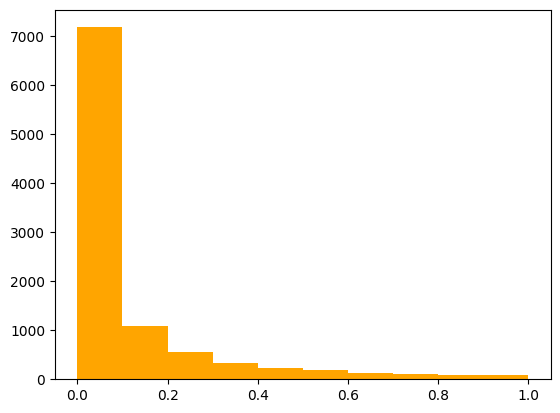

In [61]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 10, size = 1000)
    b = np.random.normal(26, 10, size = 1000)
    p = stats.ttest_ind(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='orange')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

Попробуем проверить мощность на группах меньшего размера, но с теми же параметрами:

0.1114


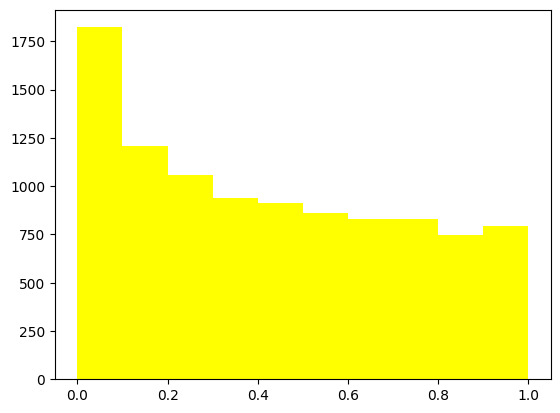

In [62]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 10, size = 100)
    b = np.random.normal(26, 10, size = 100)
    p = stats.ttest_ind(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='yellow')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

In [ ]:
А если разница средних будет больше?

0.94


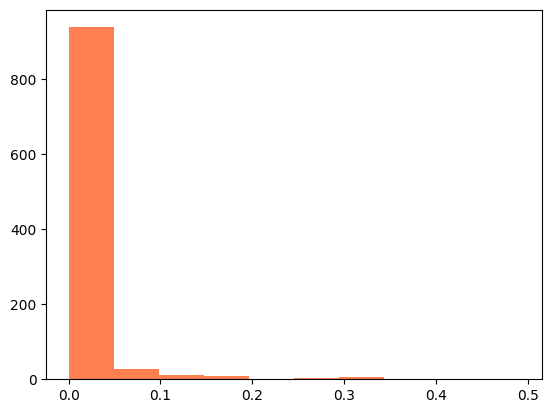

In [63]:
p_vals = []
iters = 1000
    
for _ in range(1000):
    a = np.random.normal(25, 10, size = 100)
    b = np.random.normal(30, 10, size = 100)
    p = stats.ttest_ind(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='coral')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

А если изменим дисперсии?

0.2


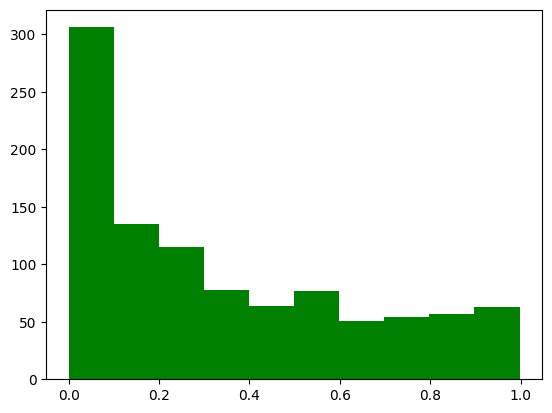

In [64]:
p_vals = []
iters = 1000
    
for _ in range(1000):
    a = np.random.normal(25, 6, size = 100)
    b = np.random.normal(26, 6, size = 100)
    p = stats.ttest_ind(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='green')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

0.1059


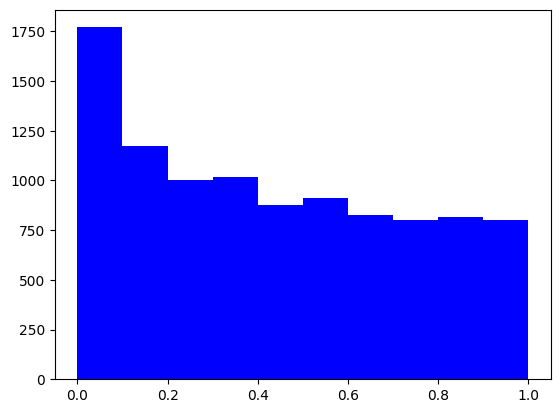

In [65]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 12, size = 1000)
    b = np.random.normal(26, 46, size = 1000)
    p = stats.ttest_ind(a, b, equal_var=False)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='blue')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

Увеличиваем дисперсии - падает мощность

0.2447


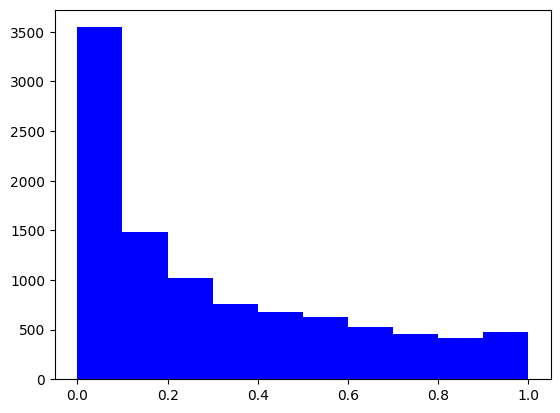

In [66]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 6, size = 1000)
    b = np.random.normal(26, 24, size = 1000)
    p = stats.ttest_ind(a, b, equal_var=False)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='blue')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

Уменьшили дисперсии (но оставили различные в группах) - выросла мощность

Попробуем с другим статкритерием:

0.2596


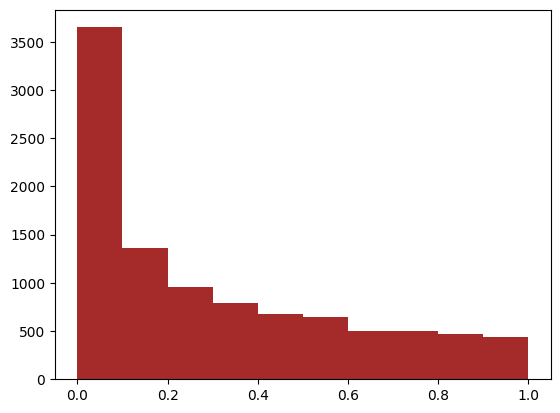

In [67]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 6, size = 1000)
    b = np.random.normal(26, 24, size = 1000)
    p = stats.mannwhitneyu(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='brown')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

Сравним мощность разных критериев для НЕномального распределения

In [ ]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.lognormal(25, 6, size = 1000)
    b = np.random.lognormal(26, 7, size = 1000)
    p = stats.mannwhitneyu(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='magenta')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

In [ ]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.lognormal(25, 6, size = 1000)
    b = np.random.lognormal(26, 7, size = 1000)
    p = stats.ttest_ind(a, b, equal_var=False)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='violet')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

# Проверка на нормальность

Можно просто построить гистограмму:

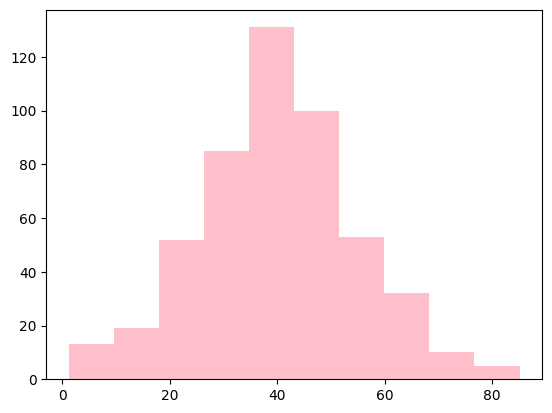

In [69]:
data = np.random.normal(40, 15, size=500)
_ = plt.hist(data, color='pink')

А можно использовать более точные методы:

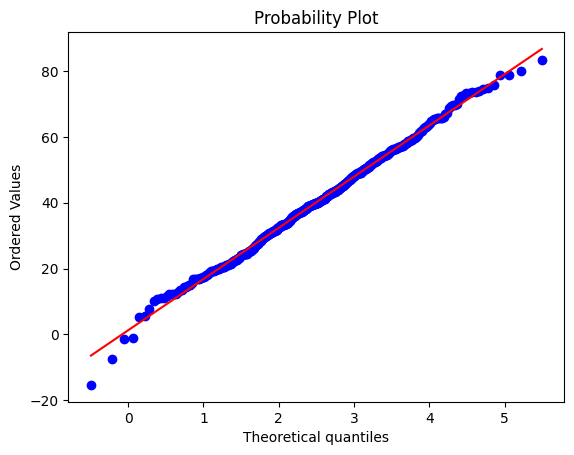

In [71]:
data = np.random.normal(40, 15, size=500)
fig = plt.figure()
ax = fig.add_subplot(111)
x = data
res = scipy.stats.probplot(x, dist='norm', sparams=(2.5,), plot=ax)
#ax.set_title("Q-Q plot")

In [72]:
stats.shapiro(data)

ShapiroResult(statistic=0.997188291274887, pvalue=0.5532434267953885)

Есть и другие тесты на проверку нормальности:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html 

In [ ]:
stats.normaltest(data)

Попробуем то же самое для данных не из нормального распределения:

In [ ]:
data_bin = np.random.binomial(1, 0.1, size =500)

In [ ]:
print(stats.normaltest(data_bin))
print(stats.shapiro(data_bin))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = data_bin
res = scipy.stats.probplot(x, dist='norm', sparams=(2.5,), plot=ax)

# Проверка на равномерность распределения

(array([45., 59., 50., 51., 44., 46., 52., 46., 61., 46.]),
 array([0.01201934, 0.51061983, 1.00922032, 1.50782081, 2.0064213 ,
        2.50502179, 3.00362228, 3.50222277, 4.00082326, 4.49942375,
        4.99802423]),
 <BarContainer object of 10 artists>)

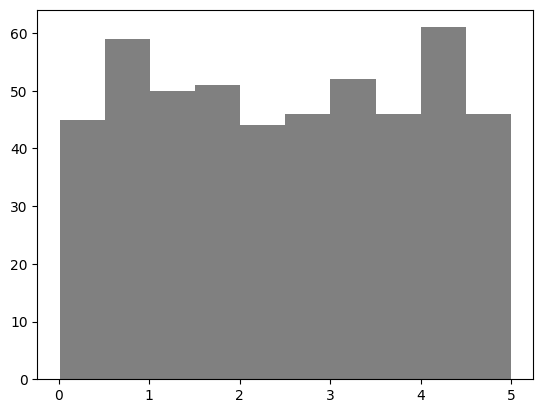

In [73]:
data_uniform = np.random.uniform(0, 5, size=500)
plt.hist(data_uniform, color='grey')

In [74]:
stats.kstest(data_uniform, stats.uniform(loc=0.0, scale=1.0).cdf)

KstestResult(statistic=0.792, pvalue=0.0, statistic_location=1.017658654742604, statistic_sign=-1)

Можно таким образом проверить равномерность распределения p-value:

In [ ]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.exponential(2, size = 1000)
    b = np.random.exponential(2, size = 100)
    p = stats.mannwhitneyu(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
    
plt.hist(p_vals, color='orange')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])
print(stats.kstest(p_vals, stats.uniform(loc=0.0, scale=1.0).cdf))

In [ ]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 80, size=1000)
    b = np.random.normal(25, 2, size=100)
    p = stats.ttest_ind(a, b, equal_var=False).pvalue
    p_vals.append(p)
        
p_vals = np.array(p_vals)
    
plt.hist(p_vals, color='green')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])
print(stats.kstest(p_vals, stats.uniform(loc=0.0, scale=1.0).cdf))

# Д3 № 1

1. Проверить работу критериев MW, Z, T на:
- выборках с выбросами размера 1000
- выборках с выбросами размера 100

2. Проверить выполнение ЦПТ для распределений (надо написать функцию):
- нормального
- биномиального
- экспоненциального
- гамма

Проверять каждое для случая 100 и 1000 наблюдений в выборке.
При необходимости можно пользоваться критериями для проверки нормальности распределения
Сделать выводы

3. Просимулировать самостоятельно проверку критерия:
- сгенерировать выборку любого размера и распределения (нормальное распределение не брать!)
- обосновать выбор критерия (или невозможность выбрать критерий)
- вычислить ошибки 1 и 2 рода
- посчитать мощность и корректность
- проверить распределение p-value на равномерность